# Primal-Dual Algorithm for Constrained Stochastic Optimization

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### initialize start by random and calculate primal

In [55]:
class primalDualModel:
    def __init__(self,sysDimension):
        self.sysDimension = sysDimension
        self.weights = np.ones(sysDimension)
        self.lambda1 = np.random.rand(1)
        self.lambda2 = np.random.rand(1)
        self.muList = np.random.rand(sysDimension)
        self.compensation = np.random.rand(sysDimension)
        assetsRewards = np.random.rand(sysDimension,sysDimension)
        self.assetsMean = np.mean(assetsRewards,1)
        self.assetsCov = np.cov(assetsRewards)

In [56]:
def primalDualUpdate(PDModel,stepSize):
    PDModel.weights = PDModel.weights - stepSize*(2*PDModel.assetsCov.dot(PDModel.weights)+PDModel.lambda1*PDModel.assetsMean+PDModel.lambda2*np.ones(PDModel.sysDimension)+sum(PDModel.muList))
    PDModel.compensation = PDModel.compensation + stepSize*(PDModel.muList*PDModel.compensation)
    PDModel.lambda1 = PDModel.lambda1 + stepSize*PDModel.weights.transpose().dot(PDModel.assetsMean)
    PDModel.lambda2 = PDModel.lambda2 + stepSize*np.ones(PDModel.sysDimension).transpose().dot(PDModel.weights)
    PDModel.muList = PDModel.muList + stepSize*(PDModel.weights+PDModel.compensation**2)

In [69]:
pdModel = primalDualModel(10)
result = []
for i in range(100):
    primalDualUpdate(pdModel,0.1/(i+1)**2)
    result.append(pdModel.weights.T.dot(pdModel.assetsCov).dot(pdModel.weights))

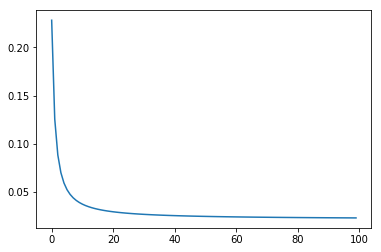

In [70]:
plt.plot(result)